In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread(r"E:\pythonProject\opencvProject\resources\bird.png")
print(img.shape[0],img.shape[1])

135 240


1. **均值滤波**

In [4]:
# 卷积核
kernal = np.ones((3, 3), dtype=np.float32) / 9
print(kernal)
img_fiter = cv2.filter2D(img, -1, kernal)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


2. **二维高斯滤波**

In [1]:
# 自定义高斯核
guass_x=cv2.getGaussianKernel(3,sigma=1)
guass_y=np.transpose(cv2.getGaussianKernel(3,1))
# 获取二维高斯核
guass_kernal=guass_x@guass_y
print(guass_kernal)
img_fiter = cv2.filter2D(img, -1, guass_kernal)

NameError: name 'cv2' is not defined

In [6]:
img_fiter=cv2.GaussianBlur(img,(5,5),0)

3. **add noise**

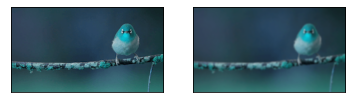

In [7]:
plt.subplot(121), plt.imshow(img), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_fiter), plt.xticks([]), plt.yticks([])
plt.show()


In [8]:
import random
# 椒盐噪声
def se_noise(image,prob):
    """
    :param image: input image
    :param prob: Salt and pepper ratio
    """
    thres=1-prob
    out_img=np.zeros(img.shape,np.uint8)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            # 0-1
            rdn=random.random()
            if rdn<prob:
                out_img[i,j]=0
            else:
                out_img[i,j]=img[i,j]

    return out_img

# 高斯噪声
def gasuss_noise(input_img,mean=0,var=0.001):
    """

    :param input_img:
    :param mean: 均值
    :param var: 方差
    """
    img=np.array(input_img/255,dtype=float)
    noise=np.random.normal(mean,var**0.5,img.shape)
    out=img+noise
    if out.min()<0:
        low_clip=-1
    else:
        low_clip=0
    out=np.clip(out,low_clip,1.0)
    out=np.uint8(out*255)
    return out

3. **中值平滑**

In [11]:
img_gaussnoise=gasuss_noise(img)
img_fiter=cv2.medianBlur(img_gaussnoise,5)

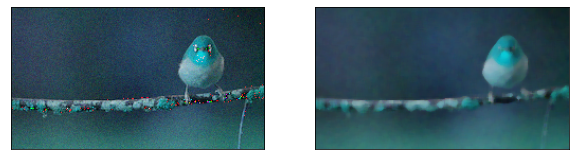

In [12]:
fig = plt.figure(figsize=(10,60))
plt.subplot(121), plt.imshow(img_gaussnoise), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_fiter), plt.xticks([]), plt.yticks([])
plt.show()